In [16]:
%matplotlib inline
import matplotlib.pyplot as plt
from scipy.stats.stats import pearsonr

In [17]:
# dataset load

print("Load Dataset ...")
paper_author_data = []
with open("../data/paper_author.txt", "r") as f:
    n, m = [int(k) for k in f.readline().split()]
    lines = f.readlines()
    assert len(lines) == m
    for line in lines:
        author_list = [int(k) for k in line.split()]
        for author in author_list:
            assert author <= n
        paper_author_data.append(author_list)
    
public_true_data = []
public_false_data = []

with open("../data/query_public.txt", "r") as f:
    with open("../data/answer_public.txt", "r") as g:
        q = int(f.readline().strip())
        f_lines = f.readlines()
        g_lines = g.readlines()
        assert q == len(f_lines) and q == len(g_lines)

        for f_line, g_line in zip(f_lines, g_lines):
            author_list = [int(k) for k in f_line.split()]
            if g_line.strip() == "True":
                public_true_data.append(author_list)
            else:
                public_false_data.append(author_list)

private_data = []
with open("../data/query_private.txt", "r") as f:
    q = int(f.readline().strip())
    lines = f.readlines()
    assert q == len(lines)

    for line in lines:
        author_list = [int(k) for k in line.split()]
        private_data.append(author_list)

true_data = paper_author_data + public_true_data

print("Load Dataset Done!")

print("# of total authors:", n)
print("# of paper_author:", len(paper_author_data))
print("# of public_true:", len(public_true_data))
print("# of true:", len(true_data))
print("# of public_false:", len(public_false_data))
print("# of private:", len(private_data))
        

Load Dataset ...
Load Dataset Done!
# of total authors: 58646
# of paper_author: 137958
# of public_true: 17242
# of true: 155200
# of public_false: 17237
# of private: 34503


corr betw pa and pt: (0.8007364650064649, 0.0)
corr betw pa and pf: (0.6019566109694101, 0.0)
corr betw pa and pv: (0.8128857486770851, 0.0)
corr betw pt and pf: (0.509265542412912, 0.0)
corr betw pt and pv: (0.6872729921012062, 0.0)
corr betw pf and pv: (0.6090805187311719, 0.0)


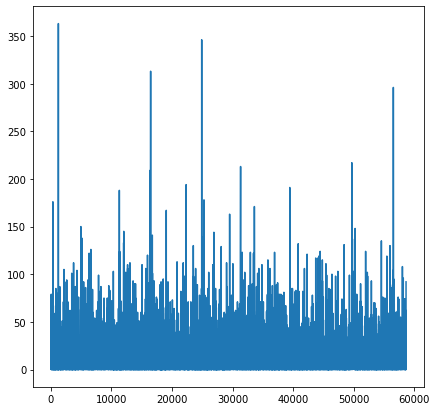

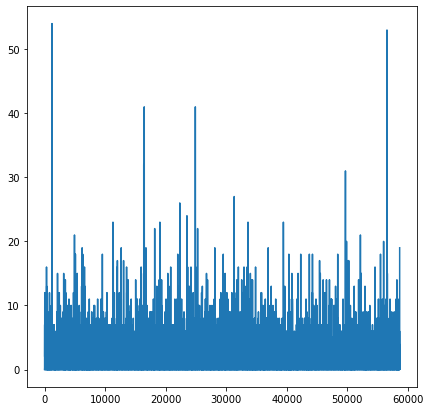

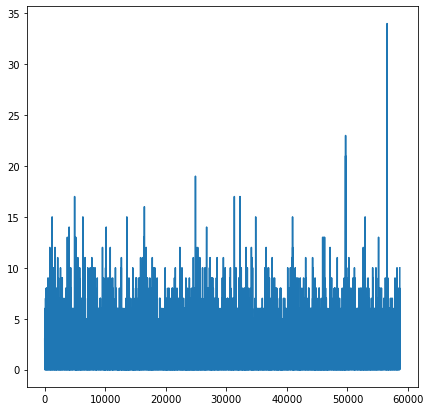

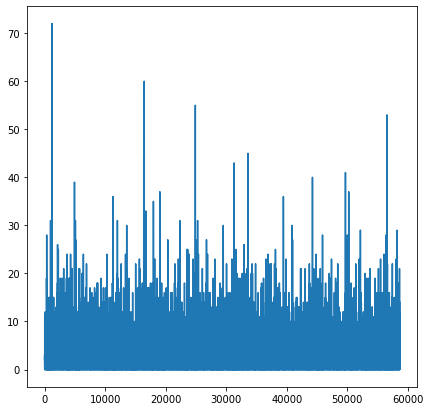

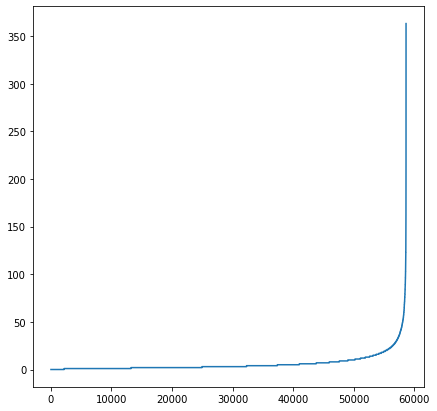

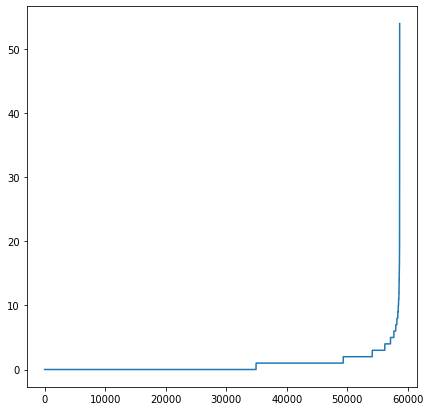

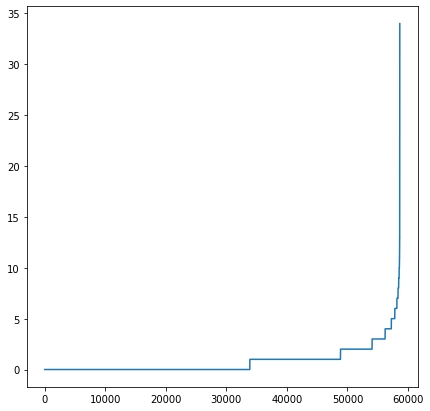

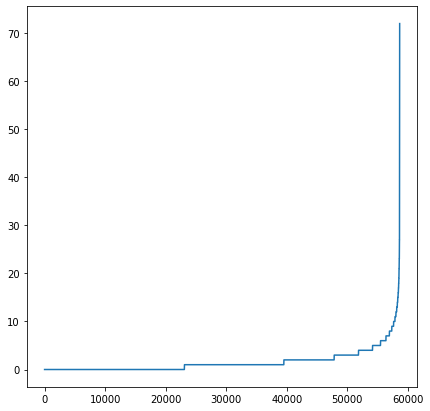

In [23]:
# Author distribution

def get_paper_counts(data):
    paper_counts = [0] * n
    for author_list in data:
        for author in author_list:
            paper_counts[author - 1] += 1
    return paper_counts
    

x = list(range(1, n + 1))
paper_author_counts = get_paper_counts(paper_author_data)
public_true_counts = get_paper_counts(public_true_data)
public_false_counts = get_paper_counts(public_false_data)
private_counts = get_paper_counts(private_data)

fig = plt.figure(figsize=(7, 7))
plt.plot(x, paper_author_counts)

fig = plt.figure(figsize=(7, 7))
plt.plot(x, public_true_counts)

fig = plt.figure(figsize=(7, 7))
plt.plot(x, public_false_counts)

fig = plt.figure(figsize=(7, 7))
plt.plot(x, private_counts)

print("corr betw pa and pt:", pearsonr(paper_author_counts, public_true_counts))
print("corr betw pa and pf:", pearsonr(paper_author_counts, public_false_counts))
print("corr betw pa and pv:", pearsonr(paper_author_counts, private_counts))
print("corr betw pt and pf:", pearsonr(public_true_counts, public_false_counts))
print("corr betw pt and pv:", pearsonr(public_true_counts, private_counts))
print("corr betw pf and pv:", pearsonr(public_false_counts, private_counts))

paper_author_counts.sort()
public_true_counts.sort()
public_false_counts.sort()
private_counts.sort()

fig = plt.figure(figsize=(7, 7))
plt.plot(x, paper_author_counts)

fig = plt.figure(figsize=(7, 7))
plt.plot(x, public_true_counts)

fig = plt.figure(figsize=(7, 7))
plt.plot(x, public_false_counts)

fig = plt.figure(figsize=(7, 7))
plt.plot(x, private_counts)



{2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25}
{2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25}
{2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25}


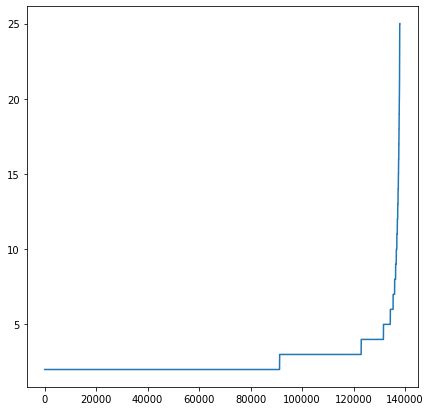

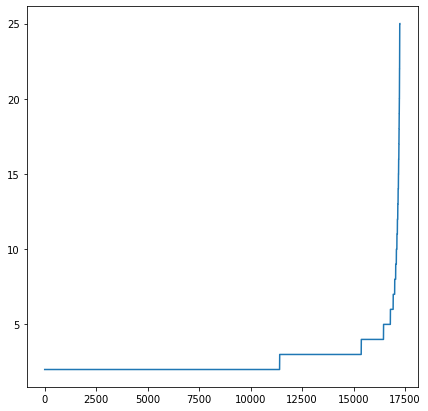

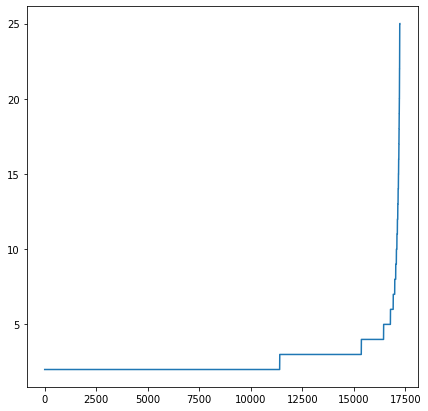

In [29]:
# Paper Distribution

fig = plt.figure(figsize=(7, 7))
len_list = [len(k) for k in paper_author_data]
len_list.sort()
print(set(len_list))
plt.plot(len_list)

fig = plt.figure(figsize=(7, 7))
len_list = [len(k) for k in public_true_data]
len_list.sort()
print(set(len_list))
plt.plot(len_list)

fig = plt.figure(figsize=(7, 7))
len_list = [len(k) for k in public_false_data]
len_list.sort()
print(set(len_list))
plt.plot(len_list)